In [ ]:
## Demo code for a Naive Bayes classifier **will not produce output**.

class NaiveBayes(object):
    """ DIY binary Naive Bayes classifier based on categorical data """

    def __init__(self, alpha=1.0):
        """ """
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
        self.is_fitted_ = False


## Fit training data (calculating prior likelihoods)
from sklearn.utils.validation import check_X_y, check_array

def fit(self, X: np.ndarray, y: np.ndarray):
    """ Fit training data for Naive Bayes classifier """

    # not strictly necessary, but this ensures we have clean input
    X, y = check_X_y(X, y)
    n = X.shape[0]

    X_by_class = np.array([X[y == c] for c in np.unique(y)])
    self.prior = np.array([len(X_class) / n for X_class in X_by_class])

    self.word_counts = np.array([sub_arr.sum(axis=0) for sub_arr in X_by_class]) + self.alpha
    self.lk_word = self.word_counts / self.word_counts.sum(axis=1).reshape(-1, 1)

    self.is_fitted_ = True
    return self

## Prediction
def predict_proba(self, X: np.ndarray) -> np.ndarray:
    """ Predict probability of class membership """

    assert self.is_fitted_, 'Model must be fit before predicting'
    X = check_array(X)

    # loop over each observation to calculate conditional probabilities
    class_numerators = np.zeros(shape=(X.shape[0], self.prior.shape[0]))
    for i, x in enumerate(X):
        word_exists = x.astype(bool)
        lk_words_present = self.lk_word[:, word_exists] ** x[word_exists]
        lk_message = (lk_words_present).prod(axis=1)
        class_numerators[i] = lk_message * self.prior

    normalize_term = class_numerators.sum(axis=1).reshape(-1, 1)
    conditional_probas = class_numerators / normalize_term
    assert (conditional_probas.sum(axis=1) - 1 < 0.001).all(), 'Rows should sum to 1'
    return conditional_probas

## Assign each method to Class
NaiveBayes.fit = fit
NaiveBayes.predict_proba = predict_proba
NaiveBayes.predict = predict

preds = NaiveBayes().fit(X, y).predict(X)
print(f'Accuracy: {(preds == y).mean()}')

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
We have 150 data samples with 4     features
['setosa' 'versicolor' 'virginica']
{np.int64(0), np.int64(1), np.int64(2)}
We have 3 classes in the data


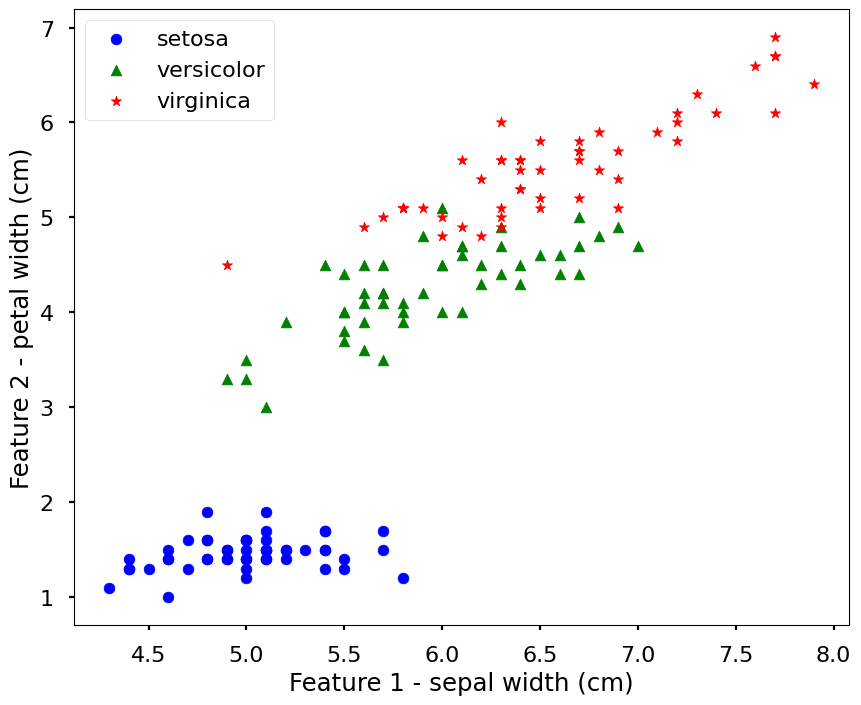

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report

plt.style.use('seaborn-v0_8-poster')
%matplotlib inline

## Import the iris data
iris = datasets.load_iris()

print(iris.feature_names)

## Only print the first 10 samples
print(iris.data[:10])
print('We have %d data samples with %d \
    features'%(iris.data.shape[0], iris.data.shape[1]))

## The data is always a 2D array, shape (n_samples, n_features), although the original data may have had a different shape.
## The following prints out the target names and the representation of the target using 0, 1, 2. Each of them represent a class.
print(iris.target_names)
print(set(iris.target))

## let's just use two features, so that we can
## easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

## Get the classes
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

## Let's have a look of the data.
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
plt.figure(figsize = (10,8))
for i, c, s in (zip(range(n_class), colors, symbols)):
    ix = y == i
    plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_names[1])
plt.ylabel('Feature 2 - ' + feature_names[3])
plt.show()

In [ ]:
## Recall our grade model. This is a very simple classifier: scores of 0.5 or above pass, otherwise they fail.
score = input("Enter score (between 0.0 and 1.0): ")
score = float(score)

if score >= 0.5:
     print("pass")
elif score < 0.5:
    print("fail")
else:
    print("invalid score")

Enter score (between 0.0 and 1.0): 0.85
pass


In [ ]:
text = "Hello, world! This is a test."
tokens = text.split()
print(f"Tokens: {tokens}")

Tokens: ['Hello,', 'world!', 'This', 'is', 'a', 'test.']


In [ ]:
import re

text = "Hello, world! This is a test."
tokens = re.findall(r'\w+|[^\w\s]', text)
print(f"Tokens: {tokens}")

text = "Hello, world! This is a test."
tokens = re.findall(r'\w+|[^\w\s]', text.lower())
print(f"Tokens: {tokens}")

Tokens: ['Hello', ',', 'world', '!', 'This', 'is', 'a', 'test', '.']
Tokens: ['hello', ',', 'world', '!', 'this', 'is', 'a', 'test', '.']
